In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [9]:
df = pd.read_csv('Mall_Customers.csv')

In [10]:
data = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

/tmp/ipython-input-10-200032522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = le.fit_transform(data['Gender'])


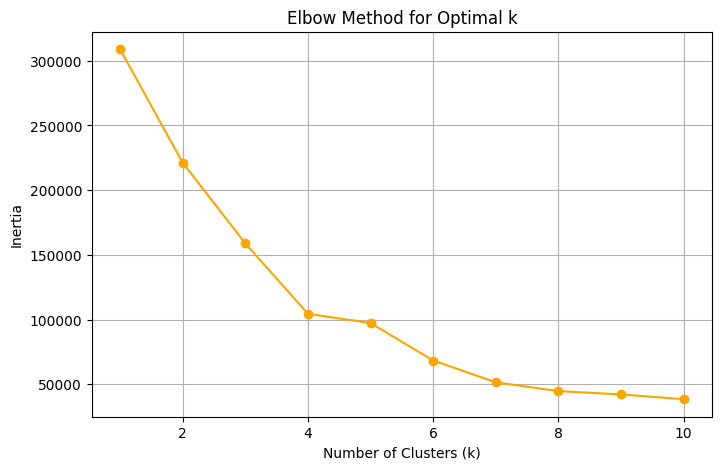

In [11]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', color='orange')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)

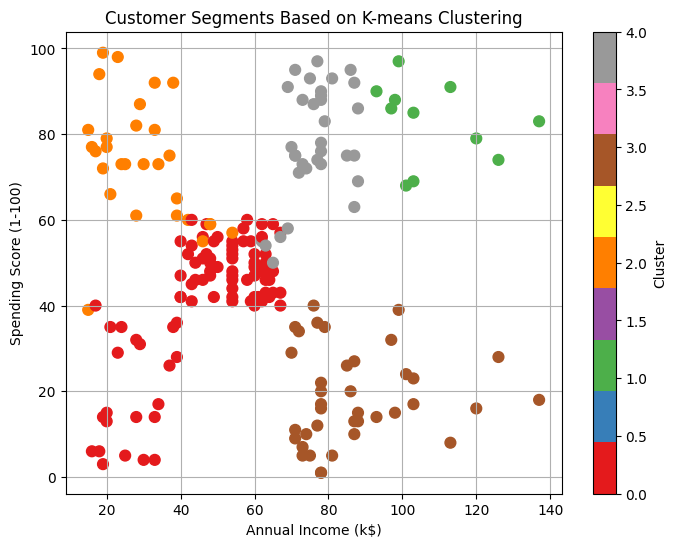

In [13]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    data['Annual Income (k$)'],
    data['Spending Score (1-100)'],
    c=data['Cluster'],
    cmap='Set1',
    s=60
)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments Based on K-means Clustering')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()
